## КМ 2

1) Создайте матрицу A размерности 100*5, заполните её числами ее
случайными числами равномерно распределенными на отрезке [-10,
10]. Для правой части b=np.array([1,2,..5]) c помощью метода
наименьших квадратов решите систему линейных уравнений Ax=b.
Сохраните решение. Найдите решение системы линейных уравнений с
помощью псевдообращения.

2) Для условий предыдущей задачи сто раз вычислите bd =
b+np.random.normal(0, sigma, 5), sigma= 0.01. Вычислите максимальное
отклонение от исходной правой части, решите систему с правой частью
bd. Вычислите максимальное отклонение решения. На график нанесите
по оси абсцисс максимальные отклонения правой части, а по оси
ординат, максимальные отклонения решения. Постройте маркерами
диаграмму рассеяния.

In [7]:
import numpy as np

def get_matrix(m=100, n=5, a=-10, b=10):
    return np.random.uniform(a, b, (m, n))


def solve_lstsq(matrix, b):
    return np.linalg.lstsq(matrix, b, rcond=-1)

def solve_reverse(matrix, b):
    matrix_plus = np.linalg.pinv(matrix)
    return np.dot(matrix_plus, b)

A = get_matrix()
b = get_matrix(100, 1, 1, 5)

s1 = solve_lstsq(A, b)
s2 = solve_reverse(A, b)

print(s1, s2, sep='\n\n')
print('Максимальная погрешность между решениями: ', np.max(s1[0]-s2))

(array([[-0.0628013 ],
       [-0.00974981],
       [-0.05739385],
       [ 0.07613826],
       [-0.04338463]]), array([1207.78035579]), 5, array([65.78130151, 60.91046382, 56.17638475, 52.46269749, 49.2809933 ]))

[[-0.0628013 ]
 [-0.00974981]
 [-0.05739385]
 [ 0.07613826]
 [-0.04338463]]
Максимальная погрешность между решениями:  5.551115123125783e-17


## Задание 2

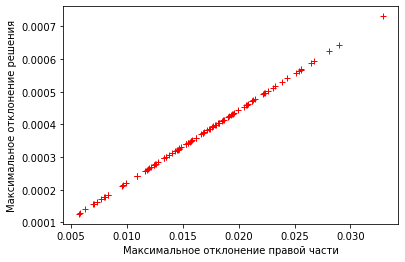

In [9]:
import matplotlib.pyplot as plt


def get_bd(b, sigma=0.01):
    return b + np.random.normal(0, sigma, 5)


dev_b_list = []
dev_s_list = []
for i in range(100):
    bd = get_bd(b)
    dev_b = np.max(np.abs(bd - b)) #Считаем отклонение правой части
    dev_b_list.append(dev_b)
    s = solve_reverse(A, bd)
    dev_s = np.max(np.abs(s2 - s)) #Считаем отклонение решения
    dev_s_list.append(dev_s)

plt.plot(dev_b_list, dev_s_list, 'r+')
plt.xlabel('Максимальное отклонение правой части')
plt.ylabel('Максимальное отклонение решения')
plt.show()